In [1]:

# Debugging settings (this cell will be removed before saving)
# change the current working directory to the one when .debug() happen
# to make relative paths work
from os import chdir
chdir("/Users/Edu/dev/projects-ploomber/ml-advanced")


Script trains a model

In [2]:
import importlib
import pickle

import pandas as pd
from sklearn.model_selection import cross_val_predict, GridSearchCV
from sklearn.metrics import classification_report
from sklearn_evaluation import plot

In [3]:
upstream = ['join']
product = None
model_class = None
model_params = None

In [4]:
# Parameters
model_class = "ml_advanced.models.logistic_reg"
model_params = {"clf__penalty": ["l1", "l2"], "clf__C": [0.5, 1.0]}
upstream = {"join": "/Users/Edu/dev/projects-ploomber/ml-advanced/output/join.parquet"}
product = {
    "nb": "/Users/Edu/dev/projects-ploomber/ml-advanced/output/fit_ml_advanced.models.logistic_reg.ipynb",
    "model": "/Users/Edu/dev/projects-ploomber/ml-advanced/output/model_ml_advanced.models.logistic_reg.joblib",
}


In [5]:
tokens = model_class.split('.')
module_name, class_name = '.'.join(tokens[:-1]), tokens[-1]

In [6]:
module_ = importlib.import_module(module_name)
class_ = getattr(module_, class_name)
clf = class_()

In [7]:
df = pd.read_parquet(str(upstream['join']))
X = df.drop('target', axis='columns')
y = df.target

In [8]:
# Perform grid search over the passed parameters
grid = GridSearchCV(clf, model_params, n_jobs=-1)

In [9]:
# We want to estimate generalization performance *and* tune hyperparameters
# so we are using nested cross-validation
y_pred = cross_val_predict(grid, X, y)

In [10]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.92      0.96      0.94        50
           2       0.96      0.92      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



<AxesSubplot:title={'center':'Confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

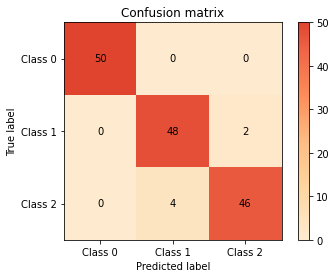

In [11]:
plot.confusion_matrix(y, y_pred)

In [12]:
# find best params
grid.fit(X, y)
grid.best_params_

{'clf__C': 0.5, 'clf__penalty': 'l2'}

<AxesSubplot:>

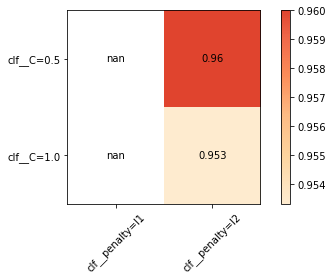

In [18]:
plot.grid_search(grid.cv_results_, change=list(model_params))

In [13]:
best = grid.best_estimator_
best

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', LogisticRegression(C=0.5))])

In [ ]:
with open(product['model'], 'wb') as f:
    pickle.dump(best, f)